#1. **Introduction**

This code was used to run experiments reported in the following paper [FCE: Feedback based Counterfactual Explanations for Explainable AI](https://ieeexplore.ieee.org/document/9819899). 
We are working to make the code more clean and easy to use for the community, and that will be updated here soon. Inquiries and collaborations can be directed to [Muhammad Suffian](https://sites.google.com/view/muhammadsuffian/home?authuser=0)

### Dataset
For this work, we have undertaken the [Bank Loan](https://www.kaggle.com/datasets/sriharipramod/bank-loan-classification/metadata)
data for a classification problem from [Kaggle](https://www.kaggle.com/)
. This dataset consists of 5000 instances with 14 features (including ID,
ZIP Code). The classification task consists of predicting one
out of two classes: (i) loan granted and (ii) loan denied.
The dataset was found to be unbalanced (9.6% loan granted
and 91.4% loan denied). We apply the classification models on the actual data and then on the balanced dataset (balancing by
using the class balancing technique SMOTE).

In [ ]:
## libraries to use
import pandas as pd 
import sklearn
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
## load data from the drive
from google.colab import drive
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/Bank_Loan.csv', encoding = 'utf-8') as csvfile:
    loandata = pd.read_csv(csvfile)

Mounted at /content/gdrive


In [ ]:
## dropping the ID column
del loandata['ID']
loandata

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
## Using the actual data for classification
loandata = pd.DataFrame(loandata) # Create a Pandas dataframe with all the features

X = loandata.loc[ : , loandata.columns != 'Personal Loan']
y = loandata['Personal Loan']


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y) # Split the data

svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(Xtrain, ytrain)
svm_test = svm.score(Xtest, ytest)


rf_mod = RandomForestClassifier(max_depth=2, random_state=0) # Initiate and fit a Model
rf_mod.fit(Xtrain, ytrain)
#rf_train = rf_mod.score(Xtrain, ytrain)
#rf_cv = cross_val_score(rf_mod, Xtrain, ytrain, cv=5).mean()
rf_test = rf_mod.score(Xtest, ytest)
#print('Evaluation of the Random Forest performance\n')
#print(f'Training score: {rf_train.round(4)}')
#print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score RF: {rf_test.round(4)}')
print(f'Test score SVM: {svm_test.round(4)}')

Test score RF: 0.9152
Test score SVM: 0.9064


In [ ]:
### performing classification after balancing the data with SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

# training of the model on balanced data (loan_data)
loan_data = pd.DataFrame(loan_data) # Create a Pandas dataframe with all the features
#income = income.drop('Unnamed: 0', 1)
X = loan_data.loc[ : , loan_data.columns != 'Personal Loan']
y = loan_data['Personal Loan']

## SMOTE for class imbalance
sm = SMOTE(random_state=42)
X_, y_ = sm.fit_resample(X, y)

# train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_, y_) # Split the data

svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(Xtrain, ytrain)
svm_test = svm.score(Xtest, ytest)
ypredsvm = svm.predict(Xtest)
conf_matrixsvm = confusion_matrix(ytest, ypredsvm)
	
print('F1 Score svm: %.3f' % f1_score(ytest, ypredsvm, average='binary'))
print('conf-matrix svm', conf_matrixsvm)


rf_mod = RandomForestClassifier(max_depth=2, random_state=0) # Initiate and fit a Model
rf_mod.fit(Xtrain, ytrain)
ypredrf = rf_mod.predict(Xtest)
conf_matrixrf = confusion_matrix(ytest, ypredrf)
	
print('F1 Score RF: %.3f' % f1_score(ytest, ypredrf, average='binary'))
print('conf-matrix RF', conf_matrixrf)
#rf_train = rf_mod.score(Xtrain, ytrain)
#rf_cv = cross_val_score(rf_mod, Xtrain, ytrain, cv=5).mean()
rf_test = rf_mod.score(Xtest, ytest)
#print('Evaluation of the Random Forest performance\n')
#print(f'Training score: {rf_train.round(4)}')
#print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score RF: {rf_test.round(4)}')
print(f'Test score SVM: {svm_test.round(4)}')

# save the model to drive
filename = '/content/gdrive/My Drive/finalized_model_RF.sav'
pickle.dump(rf_mod, open(filename, 'wb'))


F1 Score svm: 0.930
conf-matrix svm [[ 990  124]
 [  42 1104]]
F1 Score RF: 0.956
conf-matrix RF [[1092   22]
 [  76 1070]]
Test score RF: 0.9566
Test score SVM: 0.9265


In [ ]:
# Display plots inline and change default figure size
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

def plot_decision_boundary(pred_func):
  # Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# Train the RandomForestClassifier
clf1 = RandomForestClassifier(random_state=1, n_estimators=100)
clf1.fit(X, y)
# Plot the decision boundary
plot_decision_boundary(lambda x: clf1.predict(x))
plt.title("Random Forest")

In [ ]:
# this function will be used later while generation of counterfactuals
def limit_single(df, single, limit):
  org_df = df.copy()
  df[single] = df[single].values + df[single].values*0.01
  limit_s = df[single].values
  print(limit_s, limit)
  if limit_s > limit:
    return True
  else:
    return False
print(limit_single(testdf_org, single_global_feature, limit_sin))
testdf_org

[[20.2]] [[24.]]
False


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2993,65,40,20.2,92647,3,0.1,3,0,0,0,0,1


### Neighbourhood and Candidate Counterfactuals with perturbations

In [ ]:
# feature analysis
loandata['Personal Loan'].value_counts()
loandata['Personal Loan'].std()
df_one = loandata[loandata['Personal Loan']==1]
df_zero= loandata[loandata['Personal Loan']==0]
df_one['Age'].mean(), df_zero['Age'].std()
df_zero

In [ ]:
def Euclidean_Dist(df1, df2, cols=['Age','Experience']):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=0)
Euclidean_Dist(df_zero[0:1], df_one[0:1])

In [ ]:
## utility functions

# result finder
def actual_result(instance, model):
  result = model.predict(instance)
  return result

user_features = ['Online']

def val_range_Age(df):
  min = df.Age.min()
  max = df.Age.max()
  return [min, max]
def val_range_Experience(df):
  min = df.Experience.min()
  max = df.Experience.max()
  return [min, max]
def val_range_Income(df):
  min = df.Income.min()
  max = df.Income.max()
  return [min, max]
def val_range_Age(df):
  min = df.Age.min()
  max = df.Age.max()
  return [min, max]
def val_range_Age(df):
  min = df.Age.min()
  max = df.Age.max()
  return [min, max]
print(val_range_Age(x_test))



In [ ]:
continuous_feature_names = ['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage']
categorical_feature_names = ['Securities Account', 'CD Account', 'Online', 'CreditCard']

#### Feature value ranges
def get_features_range(continuous_feature_names, datadf, categorical_feature_names):
  ranges = {}
  # Getting default ranges based on the dataset
  for feature_name in continuous_feature_names:
    ranges[feature_name] = [datadf[feature_name].min(), datadf[feature_name].max()]
  for feature_name in categorical_feature_names:
    ranges[feature_name] = datadf[feature_name].unique().tolist()
    #feature_ranges_orig = ranges.copy()
    # Overwriting the ranges for a feature if input provided
    #if permitted_range_input is not None:
      #for feature_name, feature_range in permitted_range_input.items():
        #ranges[feature_name] = feature_range
  return ranges

get_features_range(continuous_feature_names, x_test, categorical_feature_names)

In [ ]:
def get_data_type(datadf, col):
  """Infers data type of a continuous feature from the training data."""
  if (datadf[col].dtype == np.int64) or (datadf[col].dtype == np.int32):
    return 'int'
  elif (datadf[col].dtype == np.float64) or (datadf[col].dtype == np.float32):
    return 'float'
  else:
    raise ValueError("Unknown data type of feature %s: must be int or float" % col)

col = "CCAvg"
get_data_type(x_test, col)

### Single parameter Pertubations

In [ ]:
 
# Single feature perturbation

def generate_testdata_synthetic(test_instance, datadf):
  synthetic_df_level1 = pd.DataFrame()
  synthetic_df_level1 = test_instance.copy()
  synthetic_df_temp1 = test_instance.copy()
  ranges_dict = get_features_range(continuous_feature_names, datadf, categorical_feature_names)
  print("range dict", ranges_dict)
  no_cf = 0
  for x in test_instance.columns: #Level data creation with single feature
    
    if get_data_type(test_instance, x) == int:
      data_type = 'int'
    if get_data_type(test_instance, x) == float:
      data_type = 'float'
    if x in ranges_dict:
      x_values = sorted(ranges_dict.get(x))
      #print('ranges', x, x_values)
    if x == 'Age':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Experience':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Income':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Family':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'CCAvg':
      apply_perturb_rate = 0.5
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(2*no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Education':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Mortgage':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Securities Account':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'CD Account':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'Online':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
    if x == 'CreditCard':
      apply_perturb_rate = 1
      no_cf = x_values[1] - test_instance[x].values
      synthetic_df_temp1[x] = test_instance[x].values
      for i in range(int(no_cf)):
        synthetic_df_temp1.loc[:, x] = synthetic_df_temp1.loc[:, x].values +apply_perturb_rate
        #print("temp", synthetic_df_temp1)
        synthetic_df_level1= pd.concat([synthetic_df_level1, synthetic_df_temp1], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
  #for level two data with multiple feature changes
  #for y in test_instance.cols:
  return synthetic_df_level1

df = generate_testdata_synthetic(x_test[1:2], x_test) #this holds perturbed data in response to single test instance

df = df.transform(np.sort)
df = df.drop_duplicates(keep='first')
df.to_csv('/content/gdrive/My Drive/synthetic_data_balanced_1.csv')

range dict {'Age': [23, 67], 'Experience': [-2, 43], 'Income': [8, 224], 'Family': [1, 4], 'CCAvg': [0.0, 9.894139603916246], 'Education': [1, 3], 'Mortgage': [0, 567], 'Securities Account': [0, 1], 'CD Account': [1, 0], 'Online': [0, 1], 'CreditCard': [0, 1]}


In [ ]:
#### Counterfactuas Generation on single feature perturbed data
pd.set_option("display.max_rows", None, "display.max_columns", None)

orig_pred = rf_mod.predict(x_test[1:2])
print("origional result", orig_pred)
cf_df_norelation = pd.DataFrame()
temp = pd.DataFrame() 
cf_count = 0
for instance in range(len(df)): #this identifies the potential candidate counterfactuals for single test instance with single-perturbed-feature
  outcome = rf_mod.predict(df[instance:instance+1])
  if outcome==1:
    temp = df[instance:instance+1]
    cf_df_norelation = pd.concat([cf_df_norelation, temp], ignore_index=True, axis=0)
    cf_count = cf_count+1

cf_df_norelation = cf_df_norelation.transform(np.sort)
cf_df_norelation = cf_df_norelation.drop_duplicates(keep='first')

cf_df_norelation.to_csv('/content/gdrive/My Drive/synthetic_data_balanced_cfs_norelation.csv')


origional result [0]


### Multi-parameter Perturbations

In [ ]:

## Permitted Ranges and Interacting Features
## those features which user selects, making their combinations

# Perturbation rate of small change
def get_perturb_rate(x):
  if x == 'CCAvg':
      apply_perturb_rate = 0.5
  else:
      apply_perturb_rate = 1
  return apply_perturb_rate
get_perturb_rate('CCAvg')
pd.set_option("display.max_rows", None, "display.max_columns", None)
uf_features = ['Age', 'Income', 'Education', 'CCAvg'] 

# finding correlation among the features, will help to user to select features later
def print_highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr()  # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold)
    correlated_features = [(corr_df.iloc[x, y], x, y) for x, y in zip(*correlated_features) if x != y and x < y]  # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0]))  # sort by correlation value
    corr_dict = dict()
    if s_corr_list == []:
        print("There are no highly correlated features with correlation:", threshold)
    else:
       for v, i, j in s_corr_list:
            cols = df[features].columns
            corr_dict[corr_df.index[i]] = corr_df.columns[j]
            print("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
    return corr_dict

features = ['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
                    'CreditCard']
print_highly_correlated(loan_data, features)

### multiple feature perturbations
def generate_testdata_synthetic2(test_instance, datadf, uf_features):
  synthetic_df_level2 = pd.DataFrame()
  synthetic_df_level2 = test_instance.copy()
  synthetic_df_temp1 = pd.DataFrame()
  synthetic_df_temp2 = pd.DataFrame()
  synthetic_df_temp3 = pd.DataFrame()
  synthetic_df_temp4 = pd.DataFrame()
  synthetic_df_temp1 = test_instance.copy()
  synthetic_df_temp2 = test_instance.copy()
  synthetic_df_temp3 = test_instance.copy()
  synthetic_df_temp4 = test_instance.copy()
  ranges_dict = get_features_range(continuous_feature_names, datadf, categorical_feature_names)
  #print("range dict", ranges_dict)
  no_cf = []
  f_ranges = []
  flag = True
  iter = 0
  for x in uf_features: 
    f_ranges = sorted(ranges_dict.get(x))
    no_cf.append(f_ranges[1] - test_instance[x].values)
  print(no_cf)
  
  no_cf0 = no_cf[0]
  synthetic_df_temp1 = synthetic_df_level2.tail(1)
  for i in range(no_cf0[0]):
    pert_rate = get_perturb_rate(uf_features[0])
    synthetic_df_temp1.loc[:, uf_features[0]] = synthetic_df_temp1.loc[:, uf_features[0]].values + pert_rate
    #print("temp", synthetic_df_temp1)
    synthetic_df_level2= pd.concat([synthetic_df_level2, synthetic_df_temp1], ignore_index = True, axis = 0)
    #print("I am in 0")
    #iter = ietr + 1
    no_cf1 = no_cf[1]
    synthetic_df_temp2 = synthetic_df_level2.tail(1)
    #print(synthetic_df_level2[uf_features[1]].values)
    for j in range(no_cf1[0]):
      pert_rate = get_perturb_rate(uf_features[1])
      synthetic_df_temp2.loc[:, uf_features[1]] = synthetic_df_temp2.loc[:, uf_features[1]].values + pert_rate
      #print("I am in 1")
      synthetic_df_level2= pd.concat([synthetic_df_level2, synthetic_df_temp2], ignore_index = True, axis = 0)
      #print(synthetic_df_level1)
      #iter = ietr + 1
      no_cf2 = no_cf[2]
      synthetic_df_temp3 = synthetic_df_level2.tail(1)
      for k in range(no_cf2[0]):
        pert_rate = get_perturb_rate(uf_features[2])
        synthetic_df_temp3.loc[:, uf_features[2]] = synthetic_df_temp3.loc[:, uf_features[2]].values + pert_rate
        #print("I am in 2")
        synthetic_df_level2= pd.concat([synthetic_df_level2, synthetic_df_temp3], ignore_index = True, axis = 0)
        #print(synthetic_df_level1)
        #iter = ietr + 1
        no_cf3 = no_cf[3]
        synthetic_df_temp4 = synthetic_df_level2.tail(1)
        for l in range(int(no_cf3[0])):
          pert_rate = get_perturb_rate(uf_features[3])
          synthetic_df_temp4.loc[:, uf_features[3]] = synthetic_df_temp4.loc[:, uf_features[3]].values + pert_rate
          #print("rte", pert_rate)
          synthetic_df_level2= pd.concat([synthetic_df_level2, synthetic_df_temp4], ignore_index = True, axis = 0)
          #print(synthetic_df_level1)
          #iter = ietr + 1
  
  return synthetic_df_level2
 
df2 = generate_testdata_synthetic2(x_test[3:4], x_test, uf_features)


In [ ]:
#dfsorted = onepreddf.copy()
#dfsorted.transform(np.sort)
df2 = df2.transform(np.sort)
df2 = df2.drop_duplicates(keep='first')
df2.to_csv('/content/gdrive/My Drive/synthetic_data_balanced_2.csv')

In [ ]:
#### Counterfactuas Generation on multi-feature perturbed data
orig_pred = rf_mod.predict(x_test[1:2])
print("origional result", orig_pred)
cf_df = pd.DataFrame()
temp = pd.DataFrame() 
cf_count = 0
#df2 = df2.sample(frac=1)
for instance in range(len(df2[:1000])): # df2 holds the multi-featured perturbed data, helps to find candidate counterfactuals 
  outcome = rf_mod.predict(df2[instance:instance+1])
  if outcome==1:
    temp = df2[instance:instance+1]
    cf_df = pd.concat([cf_df, temp], ignore_index=True, axis=0)
    cf_count = cf_count+1
    #if cf_count == 5:
      #break
cf_count

origional result [0]


103

In [ ]:
cf_df = cf_df.transform(np.sort)
cf_df = cf_df.drop_duplicates(keep='first')

cf_df.to_csv('/content/gdrive/My Drive/synthetic_data_balanced_2_withrelation.csv') # withrelation refers to multiple features perturbed

In [ ]:

#L_0 Norm via euclidean distance

def CF_Dist(df1, df2, cols=['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=0)


tempdf = pd.DataFrame(columns=['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])
test = x_test[2:3]
def CF_nearest(test_instance, cf_df):
  for x in range(len(cf_df)):
    temp = list(CF_Dist(test_instance, cf_df[x:x+1]))
    df_length = len(tempdf)
    tempdf.loc[df_length] = temp
  return tempdf


dist_df = CF_nearest(test, cf_df)
dist_df = dist_df.transform(np.sort)

### counterfactuals in response to test instance

print("Actual test instance")
display(test)
print("Counterfacuals ")
disp1 = test
disp1 = pd.concat([disp1, dist_df[0:1]], ignore_index=True, axis=0)
disp1 = disp1.sum(axis=0)
#d1 = disp1.to_frame(name = 'Counterfactual_1')

disp2 = test
disp2 = pd.concat([disp2, dist_df[1:2]], ignore_index=True, axis=0)
disp2 = disp2.sum(axis=0)
#d2 = disp2.to_frame(name = 'Counterfactual_2')

disp3 = test
disp3 = pd.concat([disp3, dist_df[2:3]], ignore_index=True, axis=0)
disp3 = disp3.sum(axis=0)
#d3 = disp3.to_frame(name = 'Counterfactual_3')
d = pd.concat([disp1, disp2, disp3], axis=1)
d

Actual test instance


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
6296,38,12,59,2,2.4,2,0,0,0,0,0


Counterfacuals 


,0,1,2
Age,58.0,58.0,58.0
Experience,31.0,31.0,31.0
Income,137.0,138.0,139.0
Family,2.0,2.0,2.0
CCAvg,3.2,3.2,3.2
Education,2.0,2.0,2.0
Mortgage,394.0,394.0,394.0
Securities Account,0.0,0.0,0.0
CD Account,0.0,0.0,0.0
Online,0.0,0.0,0.0


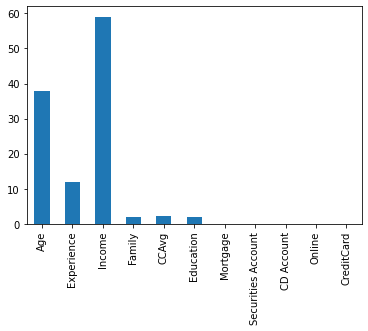

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f39e49a4190>)

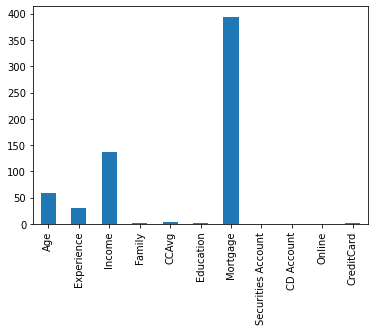

In [ ]:
row = test.iloc[0]
row.plot(kind='bar')
plt.show(), disp1.plot(kind='bar')

#2. **Feedback-based Counterfactual Explanations**

### Counterfactuals generation

In [ ]:
#@title User selected Features and permitted_ranges

#@markdown Enter the test instance number
t =    8 #@param {type:"integer"}

#@markdown Enter the number of counterfactuals
f =   3 #@param {type:"integer"}


Age = 50 #@param {type:"slider", min:23, max:67, step:1}
if Age >= Xtest['Age'][t:t+1].values:
  age = abs(np.random.normal(int(Xtest['Age'][t:t+1].values), int(Age), 100))
else:
  age = abs(np.random.normal(int(Xtest['Age'][t:t+1].values), int(Xtest['Age'][t:t+1].values), 100))
Experience = 23 #@param {type:"slider", min:-3, max:43, step:1}
Income = 55 #@param {type:"slider", min:8, max:224, step:1}
Family = 2 #@param {type:"slider", min:1, max:4, step:1}
if Family >= int(Xtest['Family'][t:t+1].values):
  Fam = abs(np.random.normal(Xtest['Family'][t:t+1].values, int(Family), 100))
else:
  Fam = abs(np.random.normal(Xtest['Family'][t:t+1].values, Xtest['Family'][t:t+1].values, 100))
CCAvg = 1.5 #@param {type:"slider", min:0.0, max:9.8, step:0.5}
Education = 2 #@param {type:"slider", min:1, max:3, step:1}
Mortgage = 15 #@param {type:"slider", min:0, max:567, step:3}
Sec_Acc = 0 #@param {type:"slider", min:0, max:1, step:1}
CD_Acc = 0 #@param {type:"slider", min:0, max:1, step:1}
Online = 1 #@param {type:"slider", min:0, max:1, step:1}
CreditCard = 1 #@param {type:"slider", min:0, max:1, step:1}


# defining the test istance ranes
data = pd.DataFrame()
data['Age'] = Age
data['Experience'] = Experience
data['Income'] = Income
data['Family'] = Family
data['CCAvg'] = CCAvg
data['Education'] = Education
data['Mortgage'] = Mortgage
data['Personal Loan'] = Personal_Loan
data['Securities Account'] = Sec_Account
data['CD Account'] = CD_Account
data['Online'] = Online
data['CreditCard'] = CreditCard


### calling here the both functions for neighbourhood data generation
df1 = generate_testdata_synthetic(Xtest[t:t+1], Xtest)
df2 = generate_testdata_synthetic2(Xtest[t:t+1], Xtest)



#data type conversion
featurelist = ['Age', 'Experience', 'Income', 'Family', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for x in featurelist:
  data[x] = data[x].round(0).astype(int)
data['CCAvg'] = np.round(data['CCAvg'].values, decimals=2)

#user ranges 
#data = data.loc[(data['Age'] >= Age) & (data['Age'] < 68)]
#data = data.loc[(data['Experience'] >= Experience) & (data['Experience'] < 44)]
#data = data.loc[(data['Income'] >= Income) & (data['Income'] < 225)]
#data = data.loc[(data['Family'] >= Family) & (data['Family'] < 5)]



# load the blackbox model
filename = '/content/gdrive/My Drive/PrototypesXAI/CF_GEN/finalized_model_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## validating counterfactuals
count = 0
countfs = pd.DataFrame()
for x in range(len(df1)):
  pred = loaded_model.predict(df1[x:x+1])
  if pred == 1:
    countfs = pd.concat([countfs, df1[x:x+1]], ignore_index=True, axis=0)
    count = count + 1

for x in range(len(df2)):
  pred = loaded_model.predict(df2[x:x+1])
  if pred == 1:
    countfs = pd.concat([countfs, df2[x:x+1]], ignore_index=True, axis=0)
    count = count + 1

#display(countfs)

print("Actual instance")
display(Xtest[t:t+1])
act_pred = loaded_model.predict(Xtest[t:t+1])
#print("Actual class prediction:", act_pred)
if act_pred == 0:
  print("Counterfactuals")
  display(countfs[:f])
else:
  print("Requirement already satisfied")


In [ ]:
from heapq import nsmallest

#L_0 Norm via euclidean distance
def CF_Dist(df1, df2, cols=['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=0)


def CF_nearest(test_instance, cf_df):
  #tempdf = pd.DataFrame(columns=['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])
  tempdf = pd.DataFrame()
  min_values = dict()
  for x in range(len(cf_df)):
    temp = list(CF_Dist(test_instance, cf_df[x:x+1]))
    min_values[x] = sum(temp)
  #display(min_values)
  #minval = min(min_values.values())
  #res = [k for k, v in min_values.items() if v==minval]
  #display(res)
  # Using nsmallest
  K = 3
  res = nsmallest(K, min_values, key = min_values.get)
  for y in res:
    tempdf = pd.concat([tempdf, cf_df[y:y+1]], ignore_index=True, axis=0)
  #display(tempdf.reset_index(drop=True))
  #tempdf = tempdf.loc[(tempdf['Age'].reset_index(drop=True) >= test_instance['Age'].reset_index(drop=True)) & (tempdf['Age'].reset_index(drop=True) < 68)]
  #tempdf = tempdf.loc[(tempdf['Experience'].reset_index(drop=True) >= test_instance['Experience'].reset_index(drop=True)) & (tempdf['Experience'].reset_index(drop=True) < 44)]
  #tempdf = tempdf.loc[(tempdf["Income"] >= test_instance["Income"]) & (tempdf["Income"] < 225)]
  #tempdf = tempdf.loc[(tempdf["Family"] >= test_instance["Family"]) & (tempdf["Family"] < 5)]
  return tempdf

#loading saved counterfactuals
with open('/content/gdrive/My Drive/synthetic_data_balanced_2_withrelation.csv',  encoding = 'utf-8') as csvfile:
    candidate_counterfactuals = pd.read_csv(csvfile)
    del candidate_counterfactuals['Unnamed: 0']
#print(candidate_counterfactuals)

# load the blackbox model
filename = '/content/gdrive/My Drive/finalized_model_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## validating counterfactuals

print("Actual instance")
display(Xtest[6:7])
act_pred = loaded_model.predict(Xtest[6:7])
#print("Actual class prediction:", act_pred)
if act_pred == 0:
  print("Counterfactuals")
  dist_df = CF_nearest(Xtest[6:7], candidate_counterfactuals)
  #display(dist_df)
  display(found_countfs[:f])
else:
  print("Requirement already satisfied")



Actual instance


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
5611,57,33,43,3,1.5,1,168,0,0,0,1


Counterfactuals


In [ ]:
toprint = CF_nearest(Xtest[6:7], candidate_counterfactuals[:3])
display(Xtest[6:7])
display(candidate_counterfactuals[:3])
display(toprint)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
5611,57,33,43,3,1.5,1,168,0,0,0,1


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,58,31,137,2,3.2,2,394,0,0,0,1
1,58,31,138,2,3.2,2,394,0,0,0,1
2,58,31,139,2,3.2,2,394,0,0,0,1


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,2.0,94.0,1.0,1.7,1.0,226.0,0.0,0.0,0.0,0.0
1,1.0,2.0,95.0,1.0,1.7,1.0,226.0,0.0,0.0,0.0,0.0
2,1.0,2.0,96.0,1.0,1.7,1.0,226.0,0.0,0.0,0.0,0.0


#3. Evaluations


1.   Target Class validity: % of CFs whose predicted class by the ML classifier is the same as the target class.
2.   Continuous-Proximity: Proximity for continuous features as the average distance between x_cf and x in units of median absolute deviation for each features.

In [ ]:
#@title 1. Target Class validity : 100 %

count_act = 0
count_found = 0
founddf = pd.DataFrame()
actdf = pd.DataFrame()
for t in range(len(Xtest)):
  act_pred = rf_mod.predict(Xtest[t:t+1])
  if act_pred == 0:
    fa = Xtest[t:t+1]
    actdf = pd.concat([actdf, fa], ignore_index=True, axis=0 )
    count_act = count_act+1
    age= int(Xtest['Age'][t:t+1].values)
    m = Xtest['Age'].max()
    temp = candidate_counterfactuals.loc[(candidate_counterfactuals['Age'] >= age) & (candidate_counterfactuals['Age'] <= m)]
    if temp.shape[0] != 0:
      f = temp[0:1]
      founddf = pd.concat([founddf, f], ignore_index=True, axis=0 )
      count_found = count_found+1
actdf.to_csv('/content/gdrive/My Drive/results_actual_Xtest_zeros.csv')
founddf.to_csv('/content/gdrive/My Drive/results_generated_cf_for_zeros.csv')
count_act, count_found, len(Xtest)

(1218, 1218, 1909)

In [ ]:
#reload the results files without running all
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/My Drive/results_actual_Xtest_zeros.csv') as csvfile:
    actdf = pd.read_csv(csvfile)
with open('/content/gdrive/My Drive/results_generated_cf_for_zeros.csv') as csvfile1:
    founddf = pd.read_csv(csvfile1)
del actdf['Unnamed: 0']
del founddf['Unnamed: 0']

In [ ]:
founddf

(Age            5.265252
 Experience     4.533915
 Income        12.167067
 Family         0.404658
 CCAvg          1.120206
 Education      0.558288
 Mortgage      89.494359
 dtype: float64, Age            9.709651
 Experience     9.635104
 Income        34.004314
 Family         1.028563
 CCAvg          1.220663
 Education      0.730923
 Mortgage      69.629275
 dtype: float64)

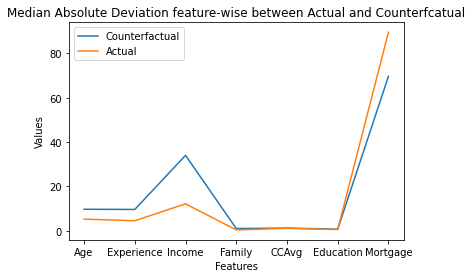

In [ ]:
#@title 2. Continuous feature proximity : plotted 
import seaborn as sns
#acttest = actdf[['Experience', 'Income']].copy()
#gentest = founddf[['Experience', 'Income']].copy()
actual = actdf[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage']].copy()
gen = founddf[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']].copy()
#print(gen.mad())
#print(actual.mad())
#ax = actual.mad(axis = 0).plot(kind='line')
#ax = gen.mad(axis = 0).plot(kind='line', title='Median Absolute Deviation feature-wise between Actual and Counterfcatual')
ax= sns.lineplot(data=actual.mad(axis=0), markers= True, label='Counterfactual')
ax= sns.lineplot(data=gen.mad(axis=0), markers= True, label='Actual')
ax.set(xlabel='Features', ylabel='Values', title='Median Absolute Deviation feature-wise between Actual and Counterfcatual')
gen.mad(), actual.mad() 


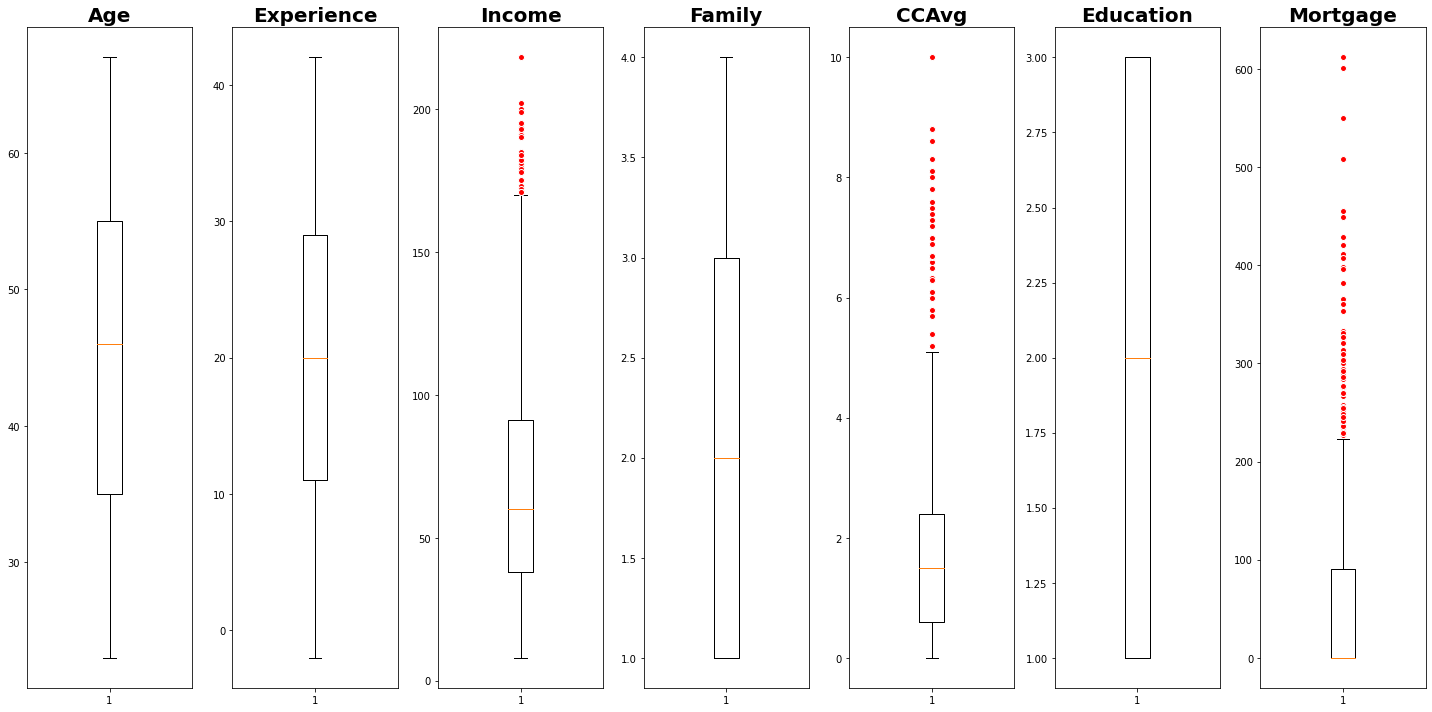

In [ ]:
import matplotlib.pyplot as plt
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(actual.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(actual.iloc[:,i], flierprops=red_circle)
    ax.set_title(actual.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

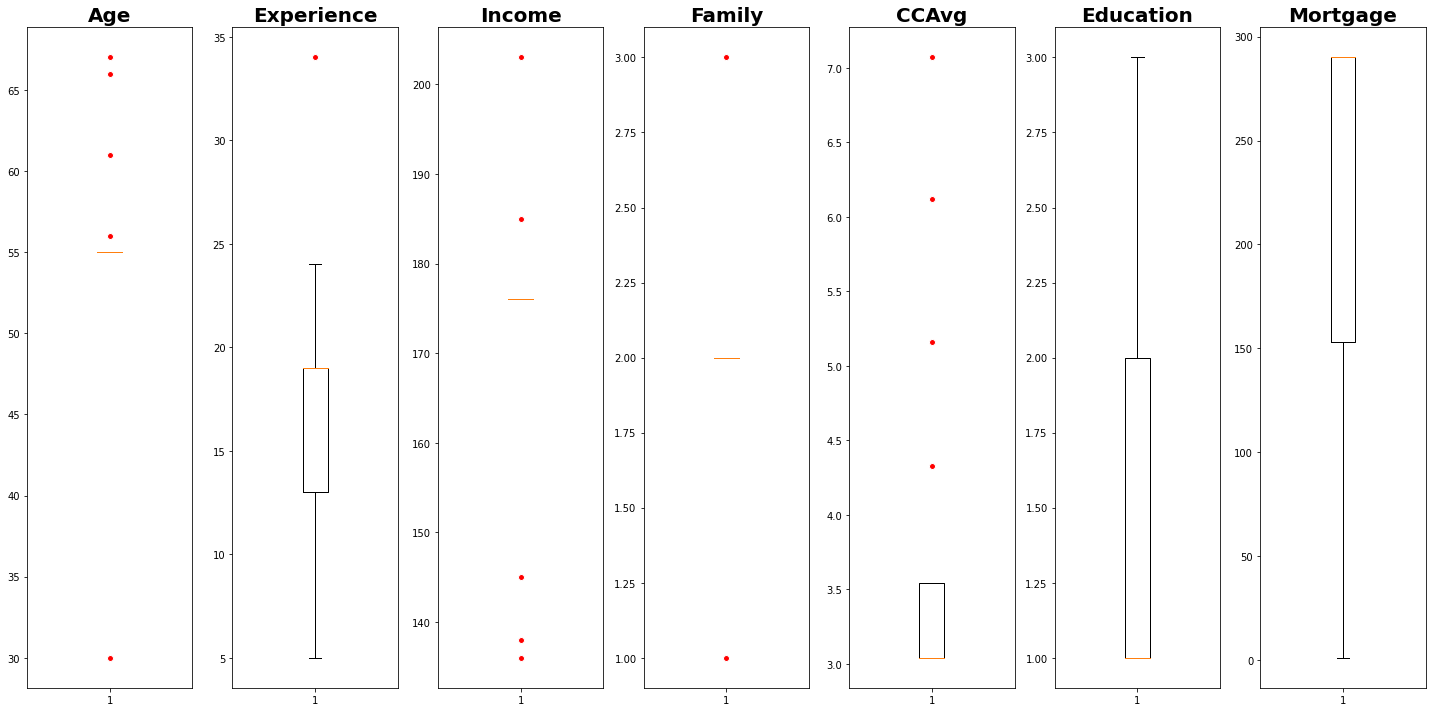

In [ ]:
import matplotlib.pyplot as plt
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(gen.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(gen.iloc[:,i], flierprops=red_circle)
    ax.set_title(gen.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Features'),
 Text(0.5, 1.0, 'MAD feature-wise on 8 Counterfcatuals')]

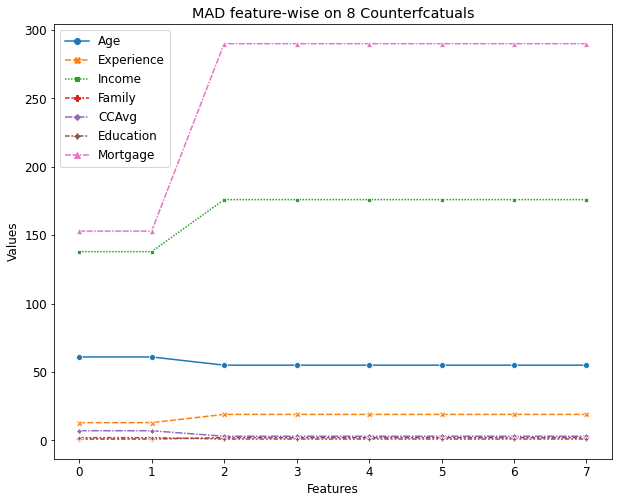

In [ ]:
#actdf[:10].plot.bar(stacked=True), founddf[:10].plot.bar(stacked=True)
#ax= sns.lineplot(data=actdf[:5], markers= True)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax= sns.lineplot(data=gen[:8], markers= True)
ax.set(xlabel='Features', ylabel='Values', title='MAD feature-wise on 8 Counterfcatuals') 

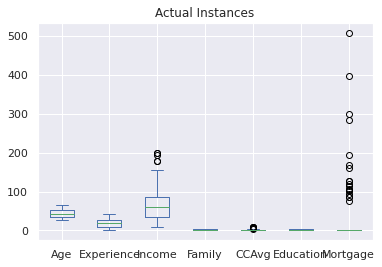

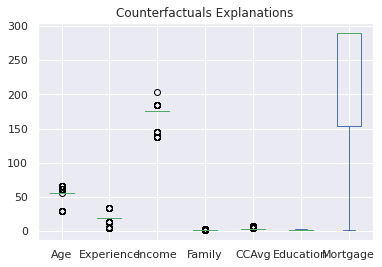

In [ ]:
import seaborn as sns
sns.set()
ax = actual[:100].plot(kind='box', stacked=False, title='Actual Instances')
ax = gen[:100].plot(kind='box', stacked=False, title='Counterfactuals Explanations')